# Beauty Product Recommender System

# Project Background

This project aims to build a beauty product recommendation system that uses the inputs provided by the users to make recommendations. The project also aims to enrich customer experience by providing tailored recommendations, increase sales and revenue by enabling the client to market regular and complimentary products, and automate the whole process to eliminate the need to memorize extensive product catalogues. The future scope of this project is to use this Python script as a reference point to develop an application to be used on kiosks in-store. This will provide an easier and more attractive user interface. 

# Instructions

*  To run the file to the end, please click on Kernel > Restart & Run All <br>
*  It is recommended to convert all the code under the section 'Data Exploration' to Markdown to avoid running these cells each time the model is used. 

# Load the Necessary Packages & Libraries

<div class="alert alert-block alert-info"> 
These libraries and packages will help us perform the necessary actions to get to the end goal. For this project, we use Pandas, Matplotlib, and Seaborn. 
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

<div class="alert alert-block alert-info"> 
Here, we are going to import the data into the Python file from your device. Please navigate to the where the file is stored and replace the path in the code with the path to the files. 
</div>

<div class="alert alert-block alert-info"> 
There are six CSV files - one with product related information and five with review information. </div>

In [2]:
# load the datasets 
# please replace the file paths to where the files are in your system. 

product_info = pd.read_csv('C:\\SDTPGMS\\2024FALL\\product_info.csv')
reviews0_250 = pd.read_csv('C:\\SDTPGMS\\2024FALL\\reviews_0-250.csv', low_memory=False)
reviews250_500 = pd.read_csv('C:\\SDTPGMS\\2024FALL\\reviews_250-500.csv', low_memory=False)
reviews500_750 = pd.read_csv('C:\\SDTPGMS\\2024FALL\\reviews_500-750.csv', low_memory=False)
reviews750_1250 = pd.read_csv('C:\\SDTPGMS\\2024FALL\\reviews_750-1250.csv', low_memory=False)
reviews1250_end = pd.read_csv('C:\\SDTPGMS\\2024FALL\\reviews_1250-end.csv', low_memory=False)

<div class="alert alert-block alert-info"> The data is now stored in a Pandas dataframe. A Pandas dataframe is a two-dimesional labeled structure that has rows and columns. You can check this by using the function type() and putting in the name of the file as shown below. </div>

In [3]:
type(product_info)

pandas.core.frame.DataFrame

# Merge Datasets

In [4]:
# We first combine all the five files with reviews to one file called 'reviews_combined'
reviews_combined = pd.concat([reviews0_250,reviews250_500,reviews500_750,reviews750_1250,reviews1250_end])

# Next, we remove duplicates (if any) in the product info CSV file
product_info.drop_duplicates(subset=['product_id'], inplace=True)

# Lastly, we merge the reviews_combined dataframe with the product_info dataframe to create a new dataframe called 'merged_data'.
# Henceforth, this file will be used primarily for analysis. 
merged_data = pd.merge(product_info, reviews_combined, on='product_id', how='left')

# Data Exploration

<div class="alert alert-block alert-info"> We look at the data to get an understanding of what the data looks like. This can be done by checking the first five rows of data in each file, statistical summaries, and visualizations. This is apart from the final model, please feel free to change these cells to markdown (from the options above that show a dropdown with the value 'Code'). This is recommended as we do not have to run these cells to get recommendations. Running these cells every time will slow down the process. </div>

In [5]:
# shape of the data 
# the output will be in the form of a tuple i.e.,(x,y). 
# X refers to the number of rows in the dataframe and Y refers to the number of columns in the dataframe. 
print(product_info.shape)
print(reviews0_250.shape)
print(reviews250_500.shape)
print(reviews500_750.shape)
print(reviews750_1250.shape)
print(reviews1250_end.shape)

(8494, 27)
(602130, 19)
(206725, 19)
(116262, 19)
(119317, 19)
(49977, 19)


## First five rows of each dataset

In [6]:
# first five rows of each dataset
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [7]:
reviews0_250.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [8]:
reviews250_500.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2190293206,2,0.0,NaN,0,0,0,2023-03-19,Used to swear by this product but hate the sme...,NaN,lightMedium,brown,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
1,1,9113341005,5,1.0,NaN,0,0,0,2023-03-18,I’ve only been using this for a week and my sk...,More tolerable than The Ordinary,deep,brown,normal,black,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
2,2,23866342710,1,0.0,1.000000,13,0,13,2023-03-12,"Why, why, why would you change the formula?!!!...",New formula is awful very sad,fairLight,blue,combination,blonde,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
3,3,1328806527,1,0.0,0.941176,17,1,16,2023-03-12,I have used this product for years and it has ...,Recently reformulated and the new formula is A...,light,brown,combination,gray,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99
4,4,31262847082,5,1.0,1.000000,1,0,1,2023-03-09,Great product for anti-aging Also great for da...,Must have product in my nighttime skincare rou...,lightMedium,hazel,combination,brown,P443842,Retinol Anti-Aging Serum,The INKEY List,12.99


In [9]:
reviews500_750.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,2079014373,5,1.0,NaN,0,0,0,2023-03-14,These are the only pimple patches I’ve used th...,Best Pimple Patches,medium,blue,normal,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
1,1,12631885517,4,1.0,NaN,0,0,0,2023-02-08,One of my ingrown hair turned inflamed and sor...,It works!,mediumTan,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
2,2,2321761961,5,1.0,1.0,1,0,1,2023-02-05,I have tried 10 different acne/blemish patches...,Good for a large or painful breakout! Sleep in...,NaN,hazel,combination,blonde,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
3,3,1380382883,4,1.0,NaN,0,0,0,2023-01-24,"Love these for my mid-size breakouts, specifyi...",Micro tips are a plus!!,light,brown,combination,black,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0
4,4,8871759068,4,1.0,1.0,1,0,1,2023-01-15,Best so far - though still not particularly ef...,NaN,NaN,NaN,NaN,NaN,P442857,Focuspot Micro Tip Patches,Dr. Jart+,20.0


In [10]:
reviews750_1250.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,8554483509,2,0.0,NaN,0,0,0,2023-03-21,This was gifted by Supergoop! in exchange for ...,Nice packaging but easy to overuse,light,brown,combination,NaN,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
1,1,24710523057,2,0.0,1.000000,2,0,2,2023-03-07,I didn’t like it; too much product comes out w...,Packaging is not suits le,NaN,brown,combination,NaN,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
2,2,8429283179,5,1.0,0.941176,34,2,32,2023-03-01,Y’all….I’m begging for everyone to read instru...,PLS READ THIS LOL,light,green,normal,brown,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
3,3,8105185455,1,0.0,0.000000,5,5,0,2023-02-27,I have not figured out how to use this product...,At a loss,tan,brown,combination,black,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0
4,4,1515931062,1,0.0,0.000000,7,7,0,2023-02-27,I’m at a loss as to how to use this thing!!! C...,NOT for me!!,fair,blue,combination,blonde,P467976,(Re)setting 100% Mineral Powder Sunscreen SPF ...,Supergoop!,35.0


In [11]:
reviews1250_end.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


## Missing Data (Percentage)

In [12]:
percent_missing = merged_data.isnull().sum() * 100 / len(merged_data)
print(percent_missing)

product_id                   0.000000
product_name_x               0.000000
brand_id                     0.000000
brand_name_x                 0.000000
loves_count                  0.000000
rating_x                     0.025260
reviews                      0.025260
size                         4.058047
variation_type               4.775777
variation_value              5.873769
variation_desc              99.134981
ingredients                  2.075591
price_usd_x                  0.000000
value_price_usd             97.166064
sale_price_usd              99.093366
limited_edition              0.000000
new                          0.000000
online_only                  0.000000
out_of_stock                 0.000000
sephora_exclusive            0.000000
highlights                  10.515522
primary_category             0.000000
secondary_category           0.000727
tertiary_category           14.710228
child_count                  0.000000
child_max_price             58.588311
child_min_pr

## Statistical Summaries

In [13]:
product_info.describe()

,brand_id,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8494.000000,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,5422.440546,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,1709.595957,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,5333.000000,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,6157.500000,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,6328.000000,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [14]:
reviews0_250.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,602130.00000,602130.000000,484644.000000,270298.000000,602130.000000,602130.000000,602130.000000,602130.000000
mean,301064.50000,4.311838,0.837922,0.769722,3.660661,0.765473,2.895189,45.723937
std,173820.10313,1.143692,0.368522,0.319103,25.848330,4.968115,22.628880,35.743990
min,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,150532.25000,4.000000,1.000000,0.666667,0.000000,0.000000,0.000000,23.500000
50%,301064.50000,5.000000,1.000000,0.944444,0.000000,0.000000,0.000000,38.000000
75%,451596.75000,5.000000,1.000000,1.000000,3.000000,0.000000,2.000000,60.000000
max,602129.00000,5.000000,1.000000,1.000000,5464.000000,573.000000,5050.000000,380.000000


In [15]:
reviews250_500.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,206725.000000,206725.000000,180739.000000,98851.000000,206725.000000,206725.000000,206725.000000,206725.000000
mean,103362.000000,4.260694,0.837207,0.767822,4.187312,0.872908,3.314403,50.997055
std,59676.511537,1.152807,0.369178,0.315407,18.218038,4.431615,15.990402,35.359101
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,51681.000000,4.000000,1.000000,0.647059,0.000000,0.000000,0.000000,30.000000
50%,103362.000000,5.000000,1.000000,0.923077,0.000000,0.000000,0.000000,44.000000
75%,155043.000000,5.000000,1.000000,1.000000,3.000000,1.000000,3.000000,68.000000
max,206724.000000,5.000000,1.000000,1.000000,2309.000000,493.000000,2077.000000,320.000000


In [16]:
reviews500_750.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,116262.000000,116262.000000,104459.000000,59838.000000,116262.000000,116262.000000,116262.000000,116262.000000
mean,58130.500000,4.288865,0.846361,0.767597,4.311830,0.926322,3.385509,49.977023
std,33562.092836,1.153702,0.360604,0.320162,18.931618,5.561677,16.062217,43.327622
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000
25%,29065.250000,4.000000,1.000000,0.666667,0.000000,0.000000,0.000000,29.000000
50%,58130.500000,5.000000,1.000000,0.933333,1.000000,0.000000,0.000000,42.000000
75%,87195.750000,5.000000,1.000000,1.000000,4.000000,1.000000,3.000000,59.000000
max,116261.000000,5.000000,1.000000,1.000000,3158.000000,500.000000,2763.000000,425.000000


In [17]:
reviews750_1250.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,119317.000000,119317.000000,110421.000000,67310.000000,119317.000000,119317.000000,119317.000000,119317.000000
mean,59658.000000,4.348064,0.858505,0.760169,4.902973,1.118793,3.784180,53.706227
std,34443.995372,1.114384,0.348533,0.320066,15.425409,5.959542,12.212018,43.155518
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,29829.000000,4.000000,1.000000,0.625000,0.000000,0.000000,0.000000,30.000000
50%,59658.000000,5.000000,1.000000,0.909091,1.000000,0.000000,1.000000,44.000000
75%,89487.000000,5.000000,1.000000,1.000000,5.000000,1.000000,3.000000,68.000000
max,119316.000000,5.000000,1.000000,1.000000,1135.000000,1094.000000,743.000000,410.000000


In [18]:
reviews1250_end.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,49977.000000,49977.000000,46160.000000,36522.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,24988.000000,4.212678,0.813323,0.767657,8.311163,1.936931,6.374232,66.884717
std,14427.261538,1.262289,0.389656,0.296319,21.285085,8.705750,16.778032,72.211730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,12494.000000,4.000000,1.000000,0.664115,0.000000,0.000000,0.000000,28.000000
50%,24988.000000,5.000000,1.000000,0.884615,3.000000,0.000000,2.000000,45.000000
75%,37482.000000,5.000000,1.000000,1.000000,9.000000,2.000000,6.000000,74.000000
max,49976.000000,5.000000,1.000000,1.000000,1222.000000,1159.000000,776.000000,1900.000000


## Visualizations

### Histograms

<div class="alert alert-block alert-info">
    Histograms show the distribution of variables.
    </div>

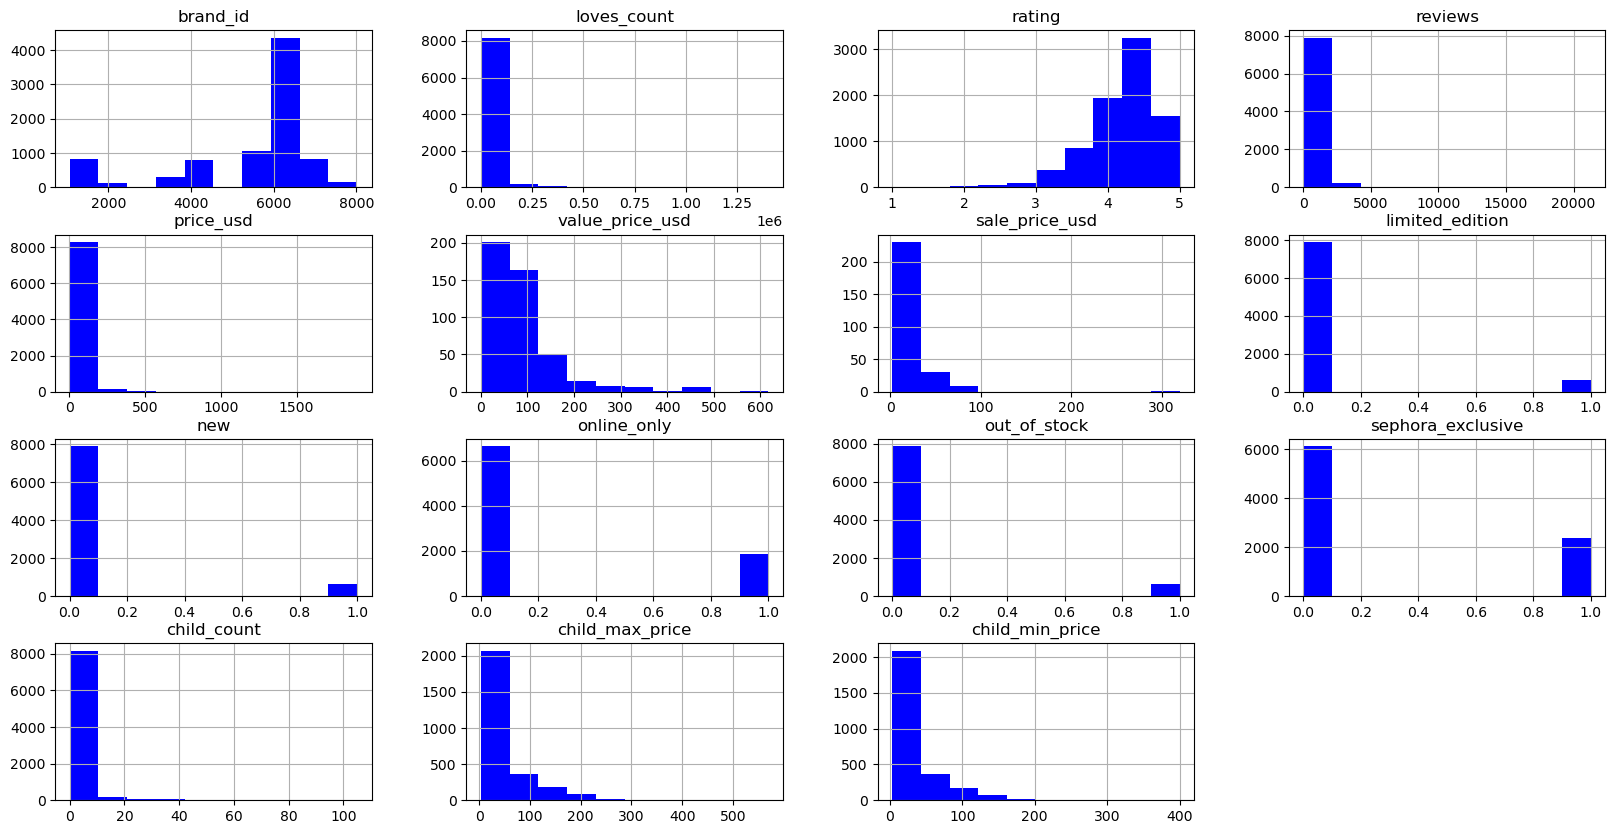

In [19]:
product_info.hist(figsize=(20,10), bins=10, color='blue')
plt.show()

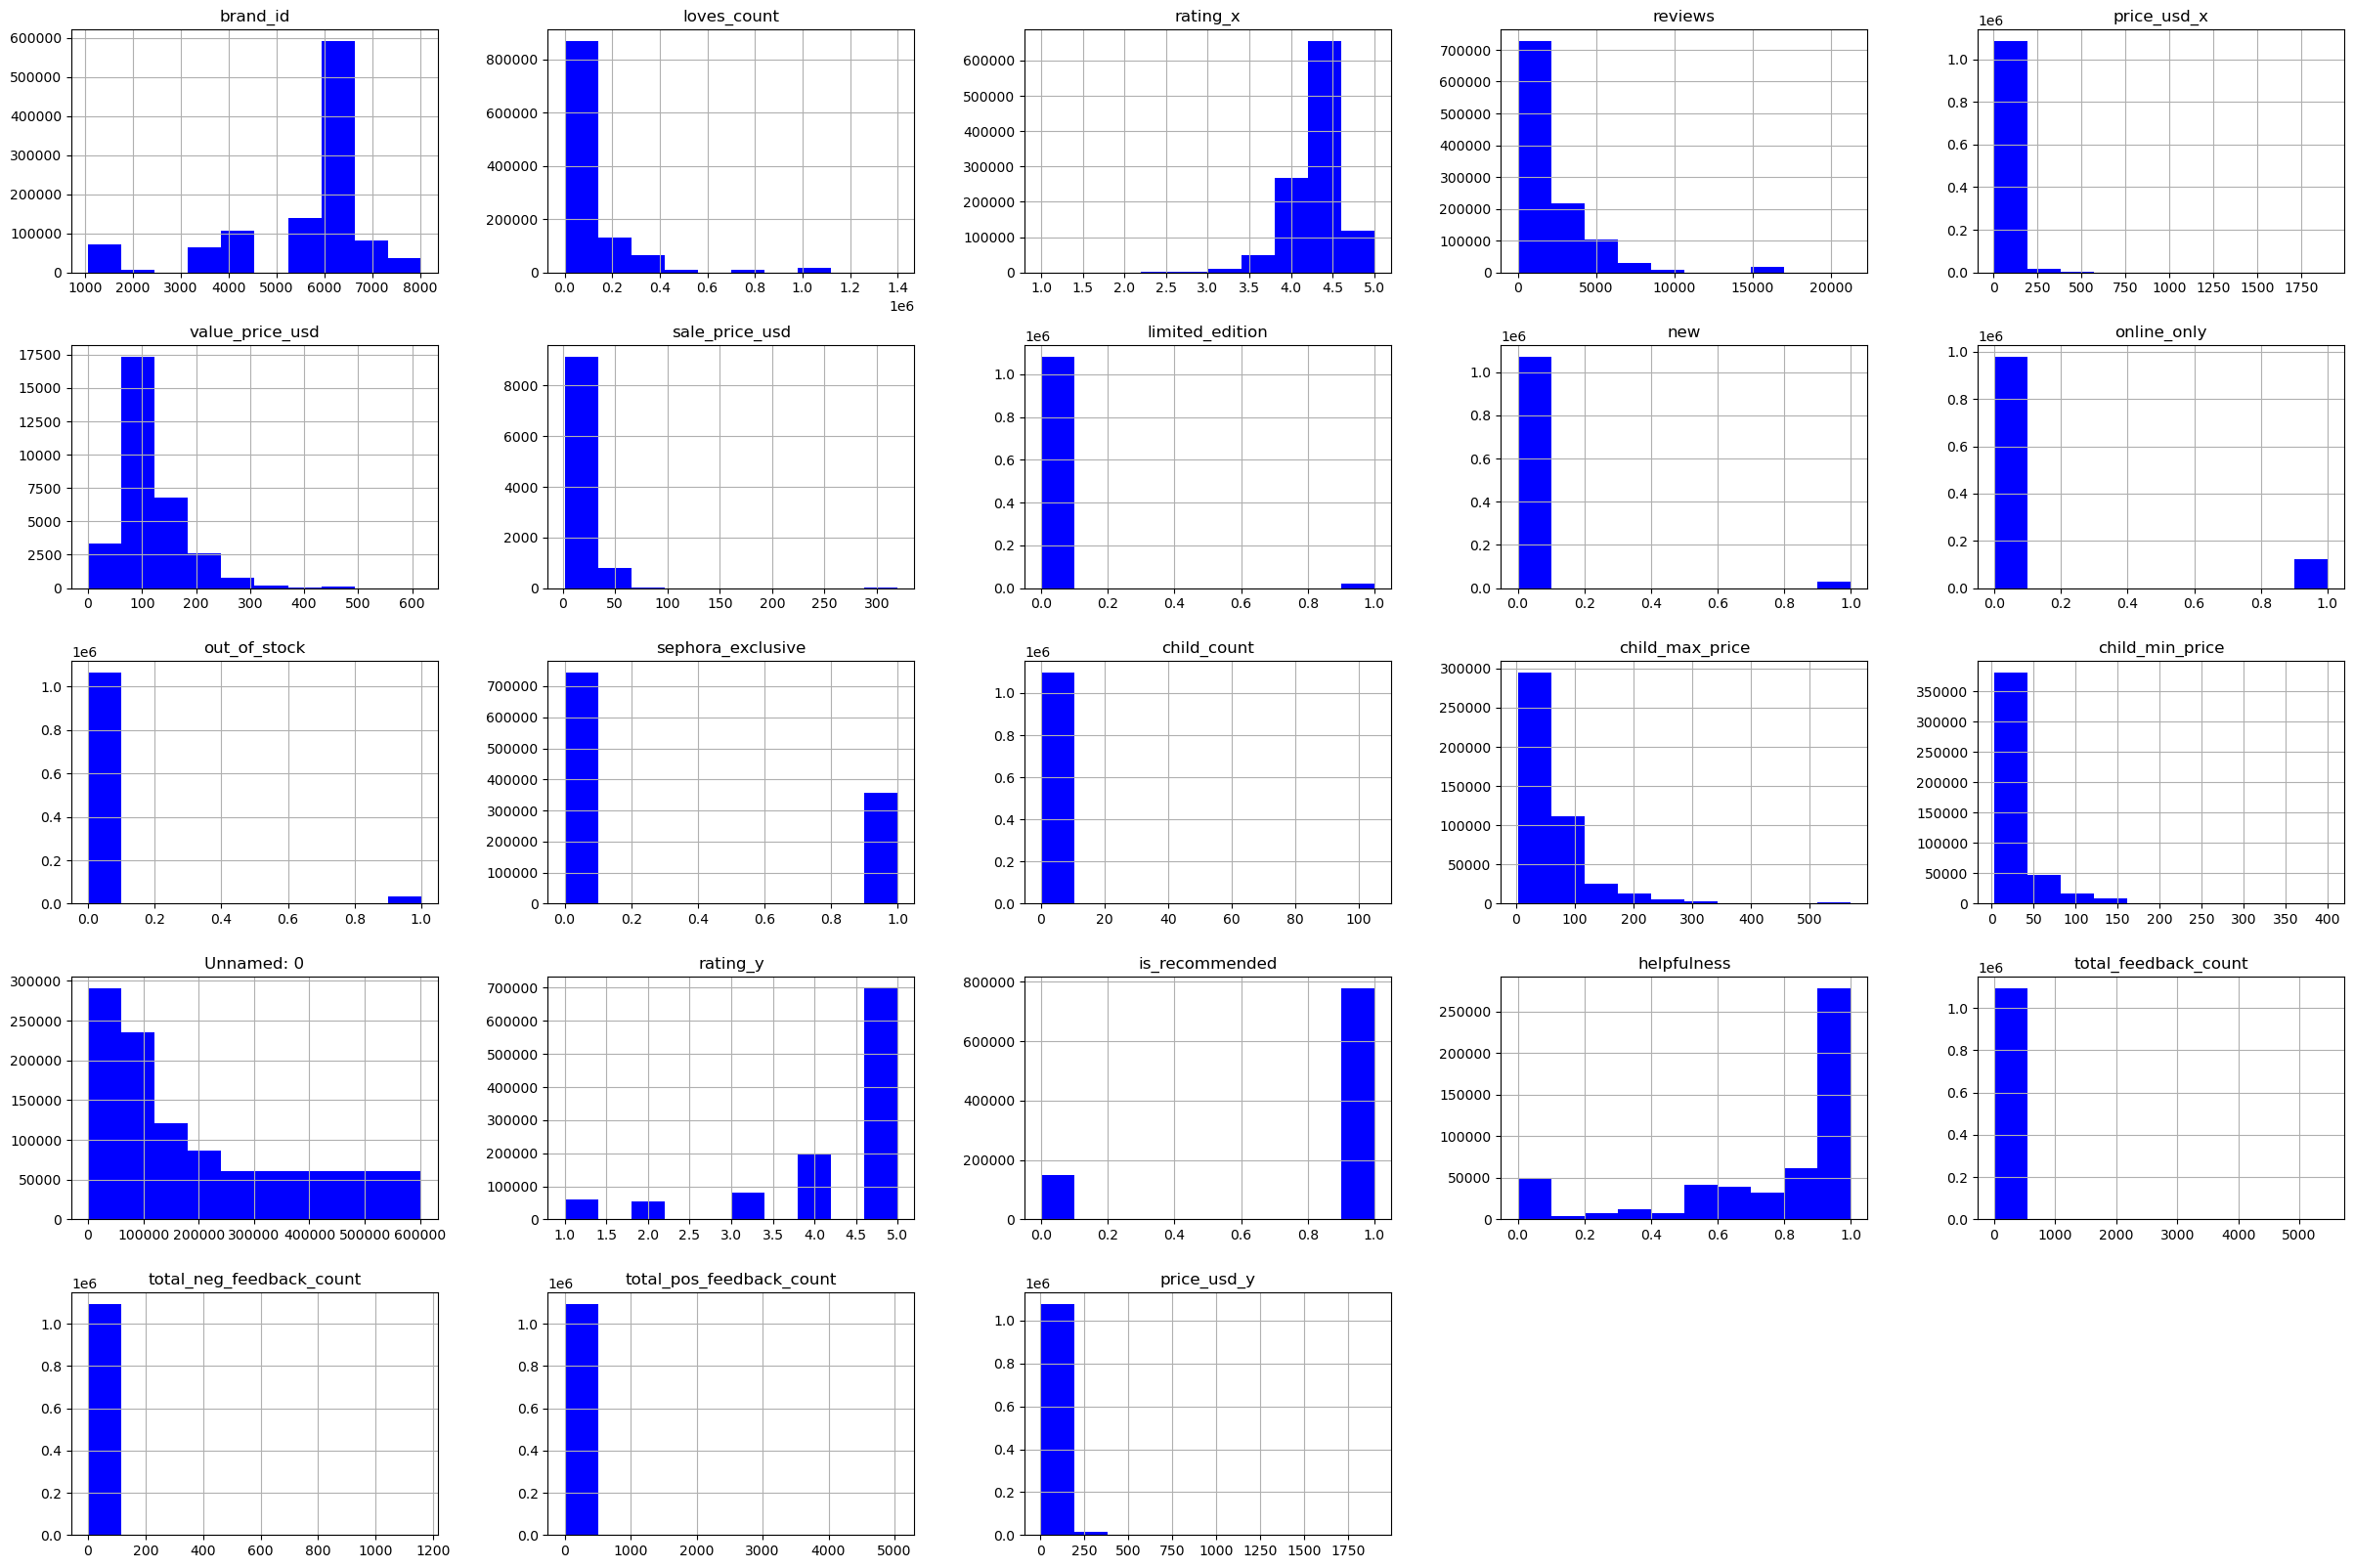

In [20]:
merged_data.hist(figsize=(30,20), bins=10, color='blue')
plt.show()

### Correlation Matrix

In [21]:
# Select numerical columns for correlation (e.g., Price, Rating, ReviewCount)
numerical_cols = merged_data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_cols.corr()

# Display the correlation matrix
correlation_matrix

,brand_id,loves_count,rating_x,reviews,price_usd_x,value_price_usd,sale_price_usd,limited_edition,new,online_only,...,child_max_price,child_min_price,Unnamed: 0,rating_y,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd_y
brand_id,1.000000,0.159837,-0.057730,0.085559,0.001514,-0.186833,-0.202426,0.076395,0.036617,-0.060695,...,0.010804,-0.039360,-0.091015,-0.014328,-0.027160,-0.001246,0.035887,0.031799,0.032884,0.002416
loves_count,0.159837,1.000000,-0.012423,0.791397,-0.148939,0.099007,-0.332625,-0.034517,-0.079736,-0.157353,...,-0.139352,-0.183531,-0.058633,-0.003197,-0.021649,0.021351,0.023833,0.017857,0.022715,-0.149454
rating_x,-0.057730,-0.012423,1.000000,0.081837,0.029051,-0.413970,0.350250,0.007078,0.139299,0.032998,...,0.039956,-0.002282,-0.019863,0.245610,0.226318,-0.016920,-0.065892,-0.056785,-0.060810,0.028379
reviews,0.085559,0.791397,0.081837,1.000000,-0.118097,-0.197467,0.107580,0.053141,-0.071545,-0.080297,...,-0.021208,-0.194523,-0.095495,0.020111,-0.004167,0.019389,-0.023272,-0.024661,-0.020239,-0.118684
price_usd_x,0.001514,-0.148939,0.029051,-0.118097,1.000000,0.938081,0.951150,0.096119,0.000082,0.008632,...,0.744238,0.636636,-0.010150,0.007105,0.019731,-0.052726,0.021480,0.021083,0.019132,1.000000
value_price_usd,-0.186833,0.099007,-0.413970,-0.197467,0.938081,1.000000,0.956806,-0.058731,0.038784,0.434010,...,0.263551,0.898299,0.322624,-0.101452,-0.072225,-0.040276,0.085791,0.088437,0.078938,0.938209
sale_price_usd,-0.202426,-0.332625,0.350250,0.107580,0.951150,0.956806,1.000000,-0.165158,NaN,0.163277,...,0.659243,0.450881,0.020223,0.157794,0.186404,0.000160,-0.062333,-0.054086,-0.053922,0.952221
limited_edition,0.076395,-0.034517,0.007078,0.053141,0.096119,-0.058731,-0.165158,1.000000,0.048263,0.038467,...,-0.037202,-0.026732,-0.026685,0.002308,0.000107,0.007367,-0.000339,0.000177,-0.000439,0.096923
new,0.036617,-0.079736,0.139299,-0.071545,0.000082,0.038784,NaN,0.048263,1.000000,0.057440,...,0.025041,0.055393,-0.042959,0.033335,0.033913,-0.021653,-0.015653,-0.012692,-0.014660,-0.000376
online_only,-0.060695,-0.157353,0.032998,-0.080297,0.008632,0.434010,0.163277,0.038467,0.057440,1.000000,...,-0.048951,0.048618,-0.023104,0.008702,0.016371,-0.004417,-0.006134,-0.003623,-0.006108,0.007983


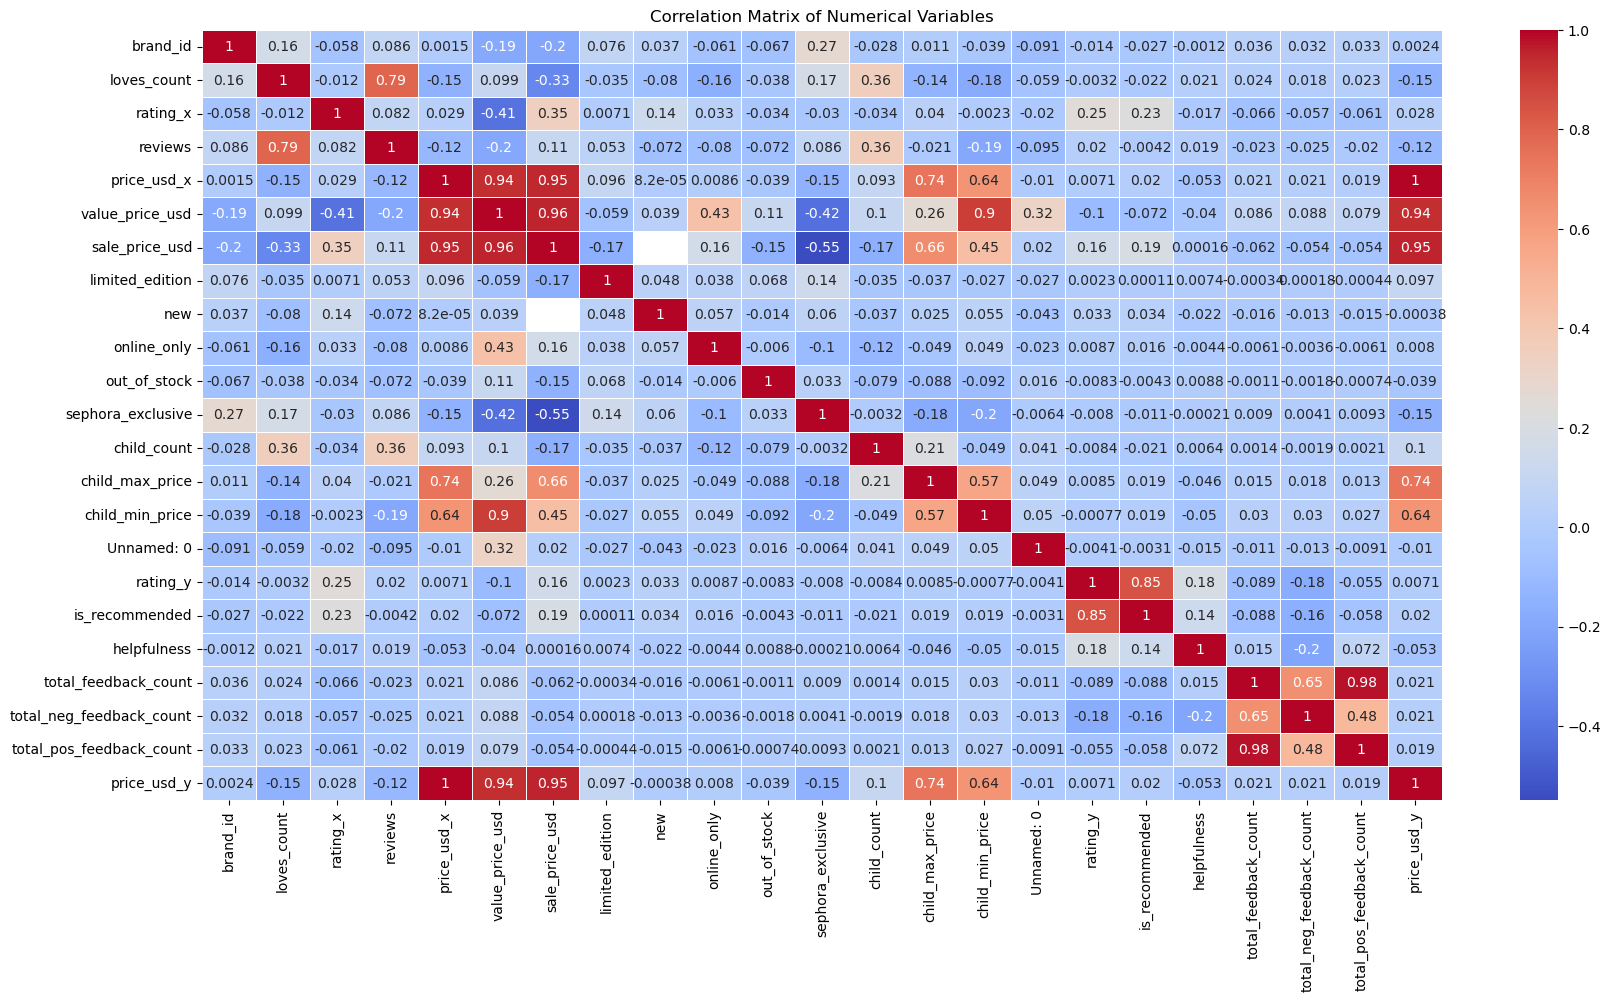

In [22]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Bar Plots

In [23]:
merged_data.head()

,product_id,product_name_x,brand_id,brand_name_x,loves_count,rating_x,reviews,size,variation_type,variation_value,...,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_name_y,brand_name_y,price_usd_y
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


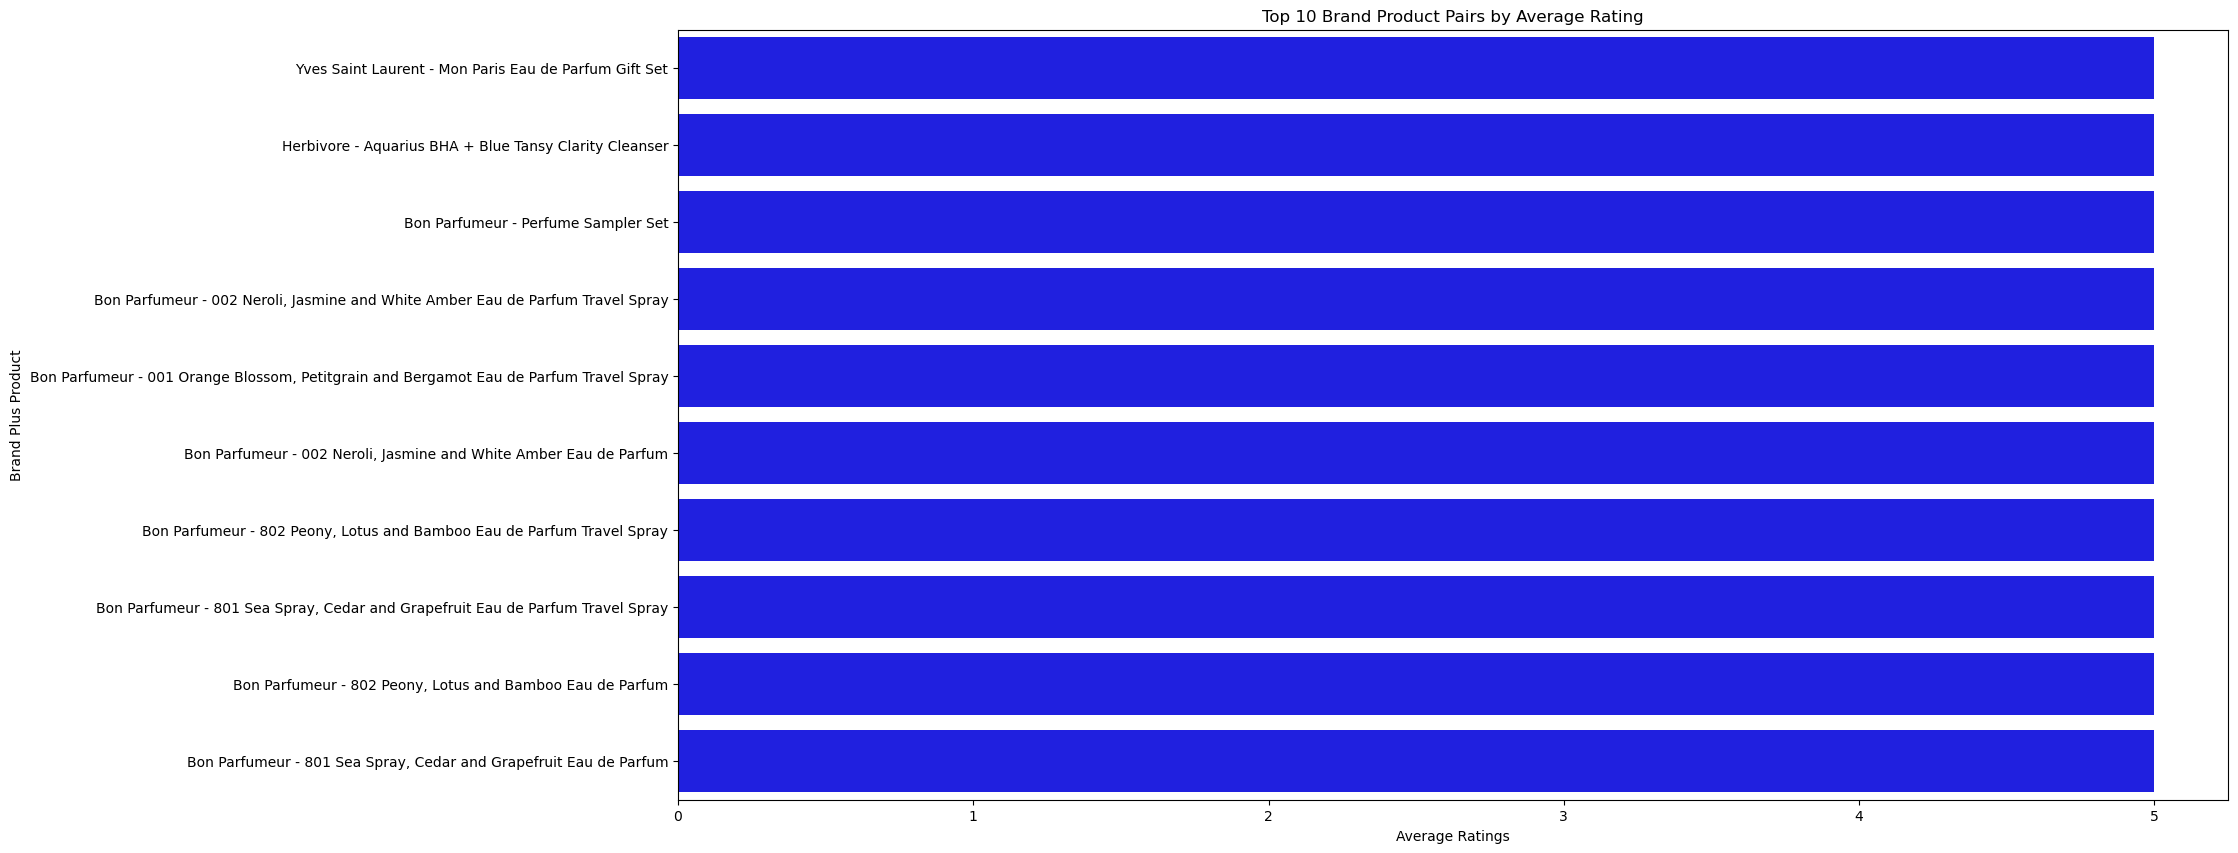

In [24]:
# Top 10 brand product pairs by average ratings
merged_data['brand_plus_product'] = merged_data['brand_name_x'] + ' - ' + merged_data['product_name_x']
sorted_by_ratings =  merged_data.sort_values(by='rating_x', ascending=False)
unique_values_brand_product = sorted_by_ratings.drop_duplicates('brand_plus_product')
top_10_brand_products = unique_values_brand_product.head(10)

# bar chart
plt.figure(figsize=(20,10))
sns.barplot(x='rating_x', y='brand_plus_product', data=top_10_brand_products, color='blue')
plt.title('Top 10 Brand Product Pairs by Average Rating')
plt.xlabel('Average Ratings')
plt.ylabel('Brand Plus Product')
plt.show()

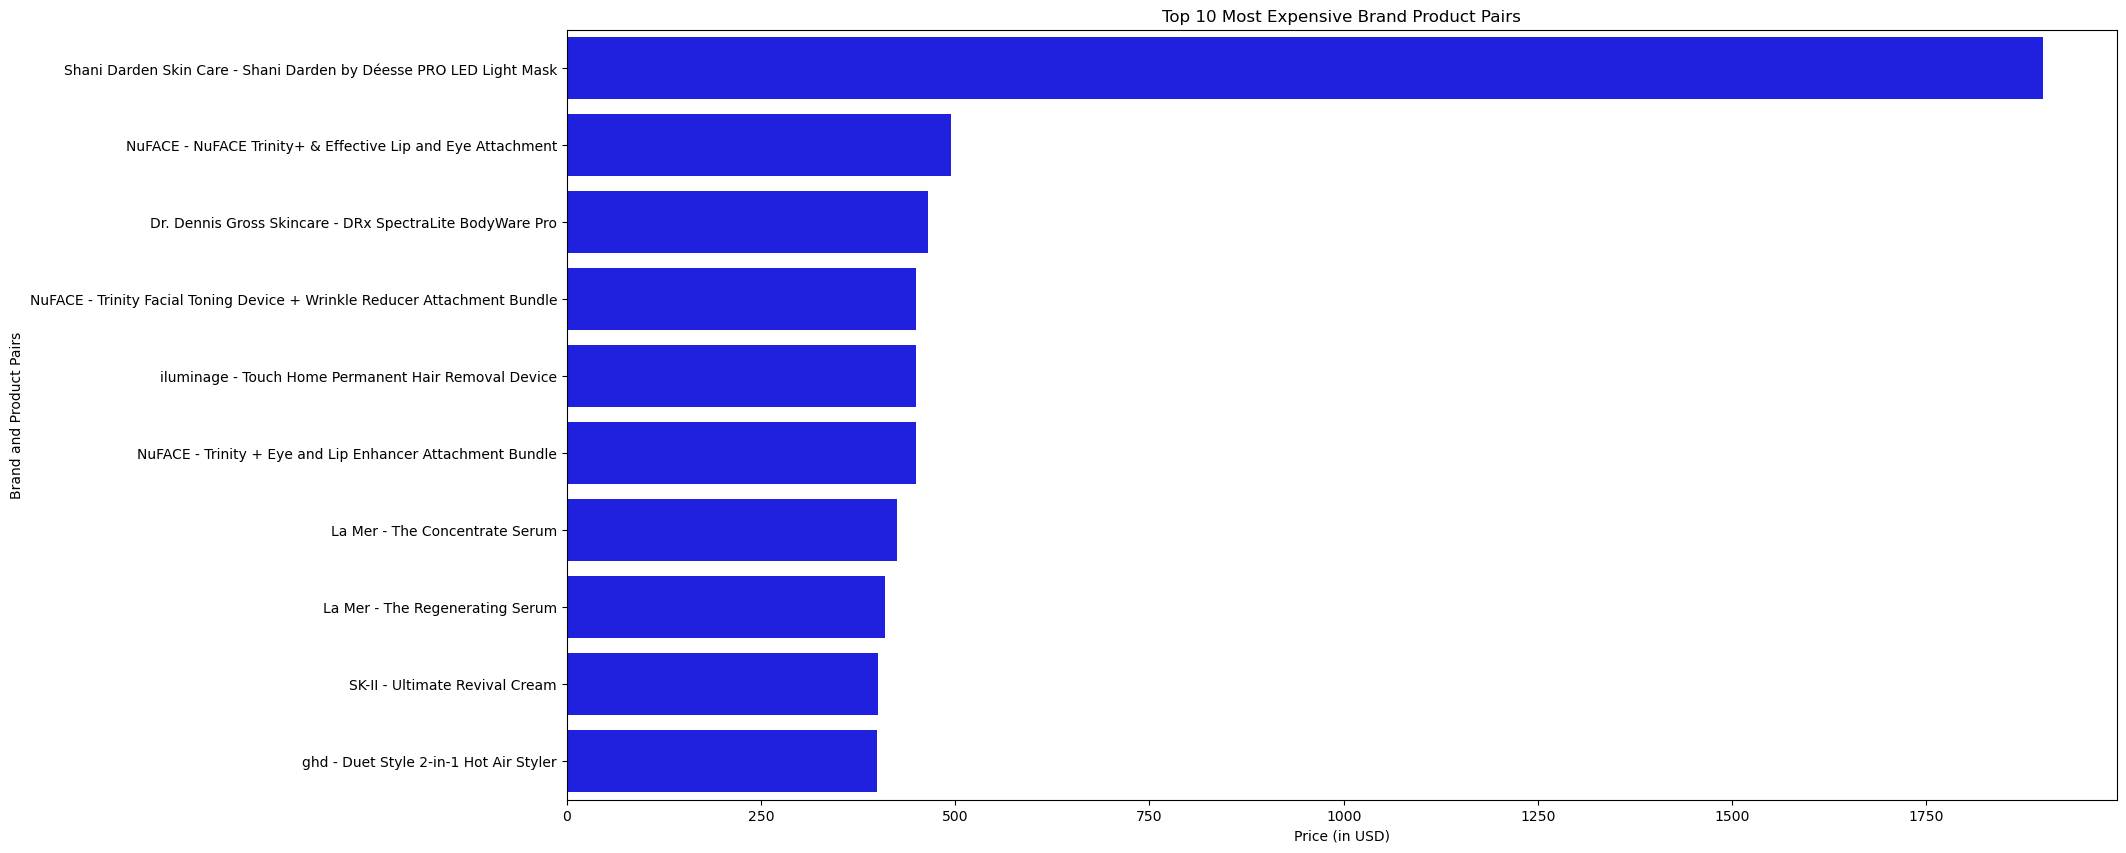

In [25]:
# Ten most expensive products
filtered_product_data = merged_data.dropna(subset=['price_usd_x'])
unique_filtered_product_data = filtered_product_data.drop_duplicates('brand_plus_product')
most_expensive_products = unique_filtered_product_data.sort_values(by='price_usd_x', ascending=False).head(10)

# bar chart
plt.figure(figsize=(20,10))
sns.barplot(x='price_usd_x', y='brand_plus_product', data=most_expensive_products, color='blue')
plt.title('Top 10 Most Expensive Brand Product Pairs')
plt.xlabel('Price (in USD)')
plt.ylabel('Brand and Product Pairs')
plt.show()

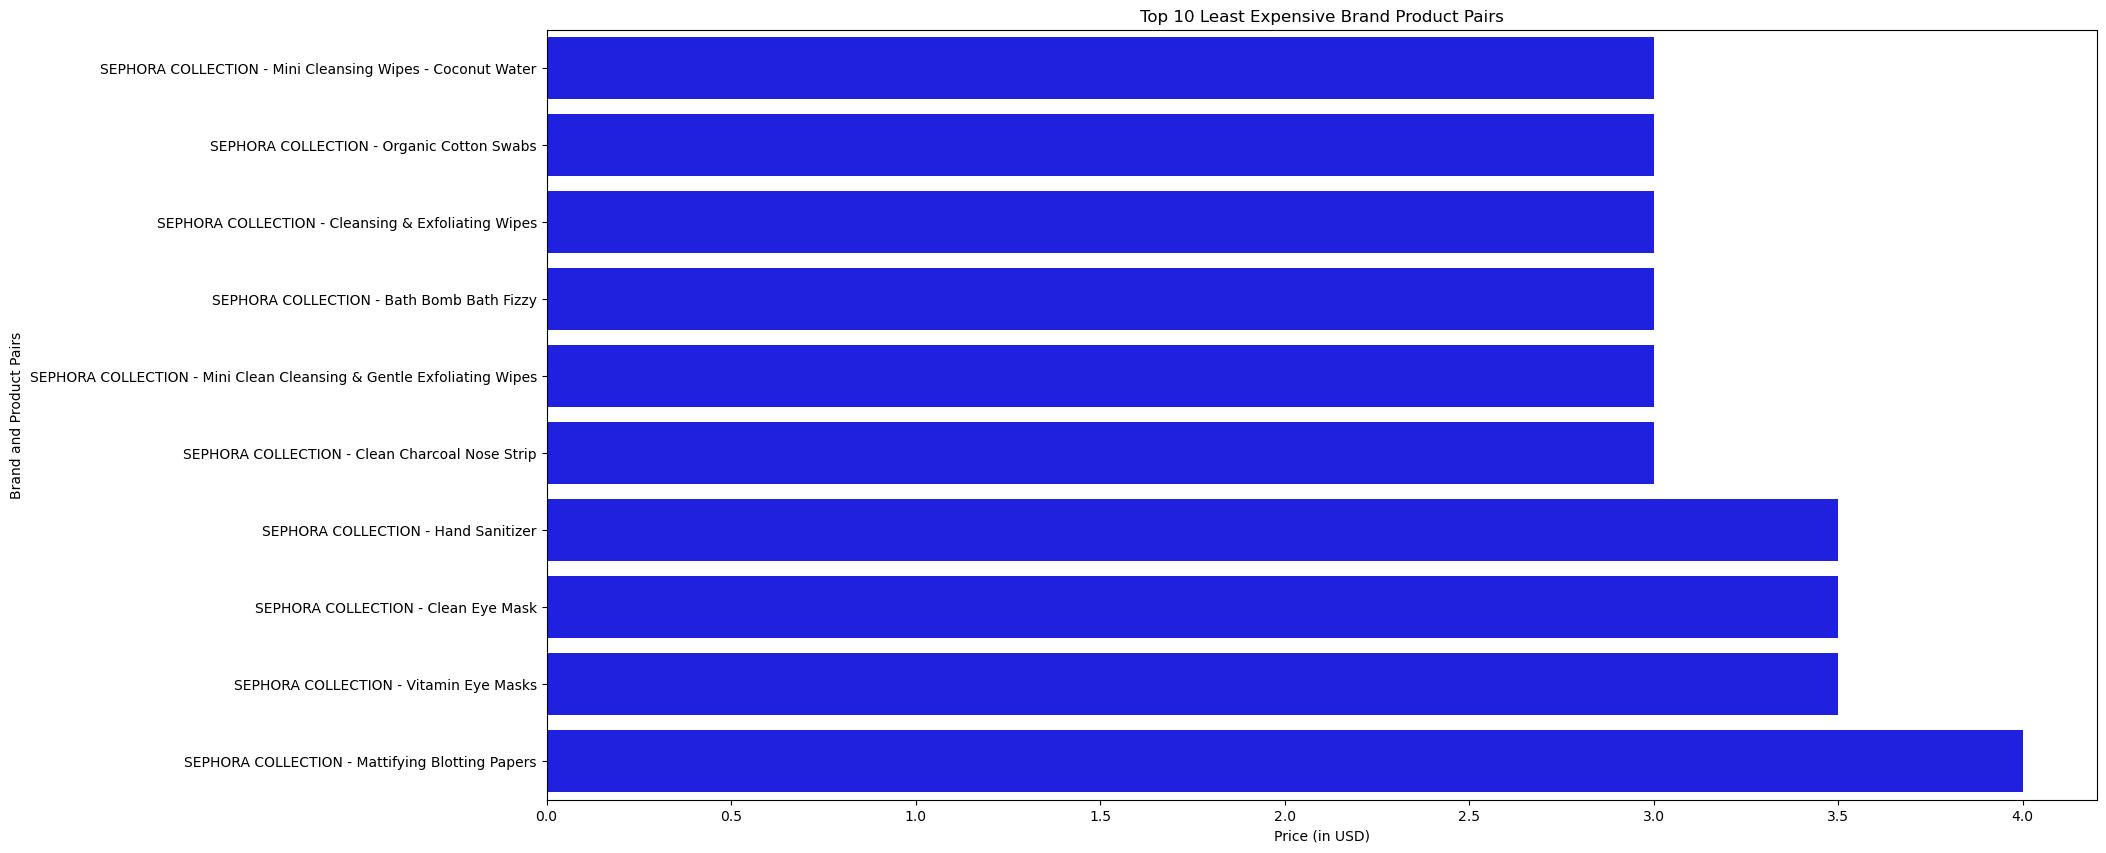

In [26]:
# ten least expensive products
filtered_product_data_least = merged_data.dropna(subset=['price_usd_x'])
unique_filtered_product_data_least = filtered_product_data_least.drop_duplicates('brand_plus_product')
least_expensive_products = unique_filtered_product_data_least.sort_values(by='price_usd_x', ascending=True).head(10)

# bar chart
plt.figure(figsize=(20,10))
sns.barplot(x='price_usd_x', y='brand_plus_product', data=least_expensive_products, color='blue')
plt.title('Top 10 Least Expensive Brand Product Pairs')
plt.xlabel('Price (in USD)')
plt.ylabel('Brand and Product Pairs')
plt.show()

### Scatterplots 

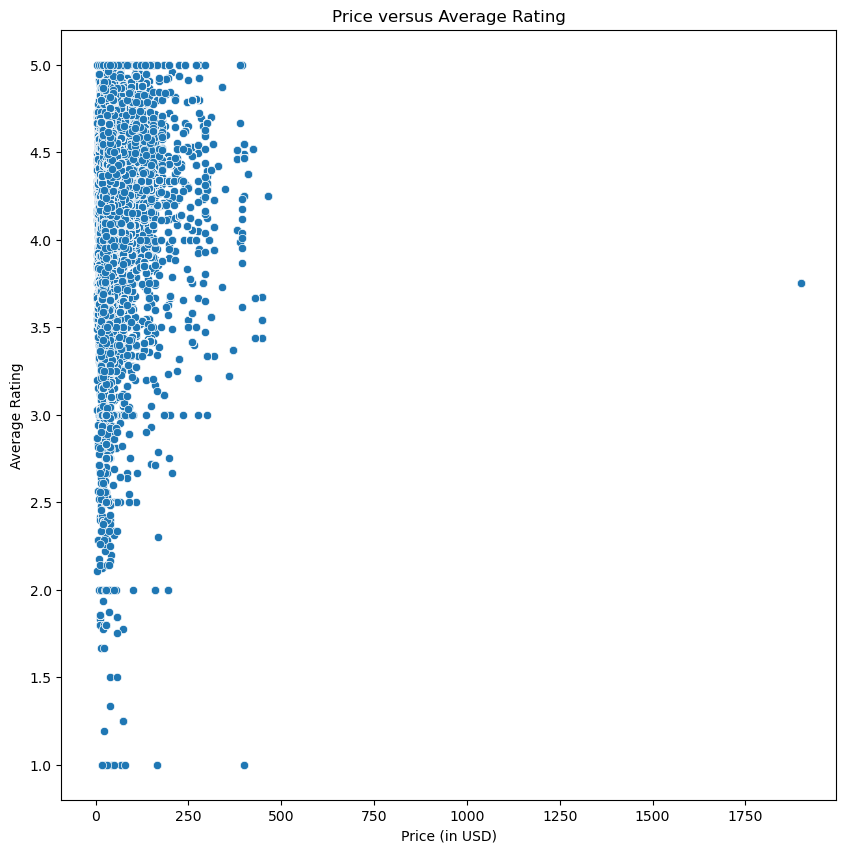

In [27]:
filtered_product_data = merged_data.dropna(subset=['price_usd_x', 'rating_x'])

# scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(x='price_usd_x', y='rating_x',  data=filtered_product_data)
plt.title('Price versus Average Rating')
plt.xlabel('Price (in USD)')
plt.ylabel('Average Rating')
plt.show()

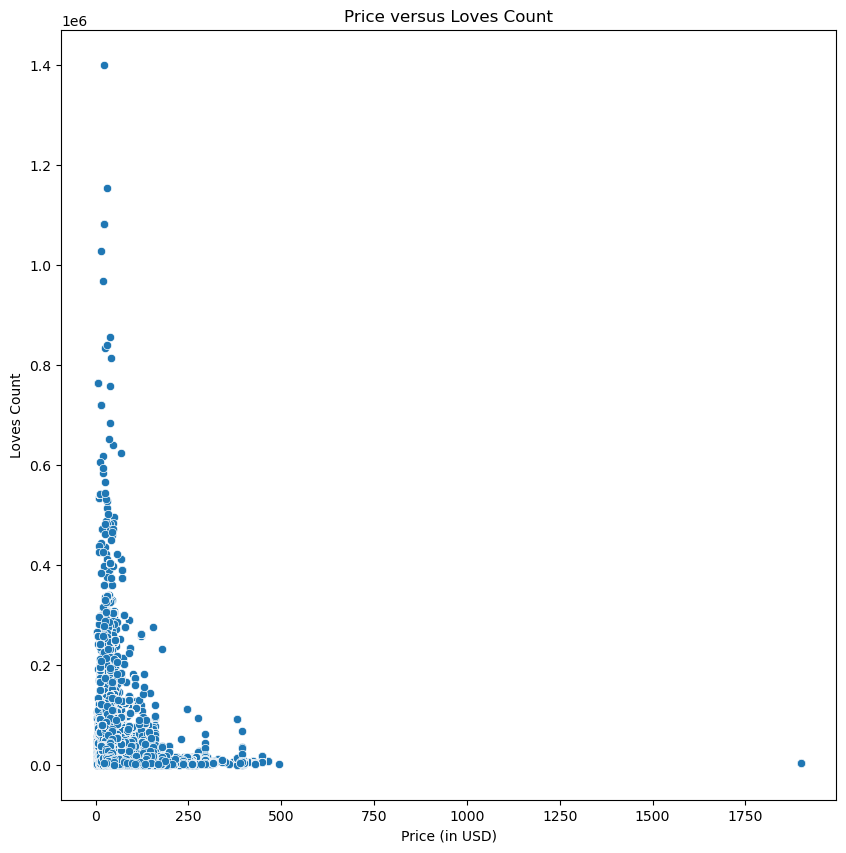

In [28]:
filtered_product_data2 = merged_data.dropna(subset=['price_usd_x', 'loves_count'])

# scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(x='price_usd_x', y='loves_count',  data=filtered_product_data2)
plt.title('Price versus Loves Count')
plt.xlabel('Price (in USD)')
plt.ylabel('Loves Count')
plt.show()

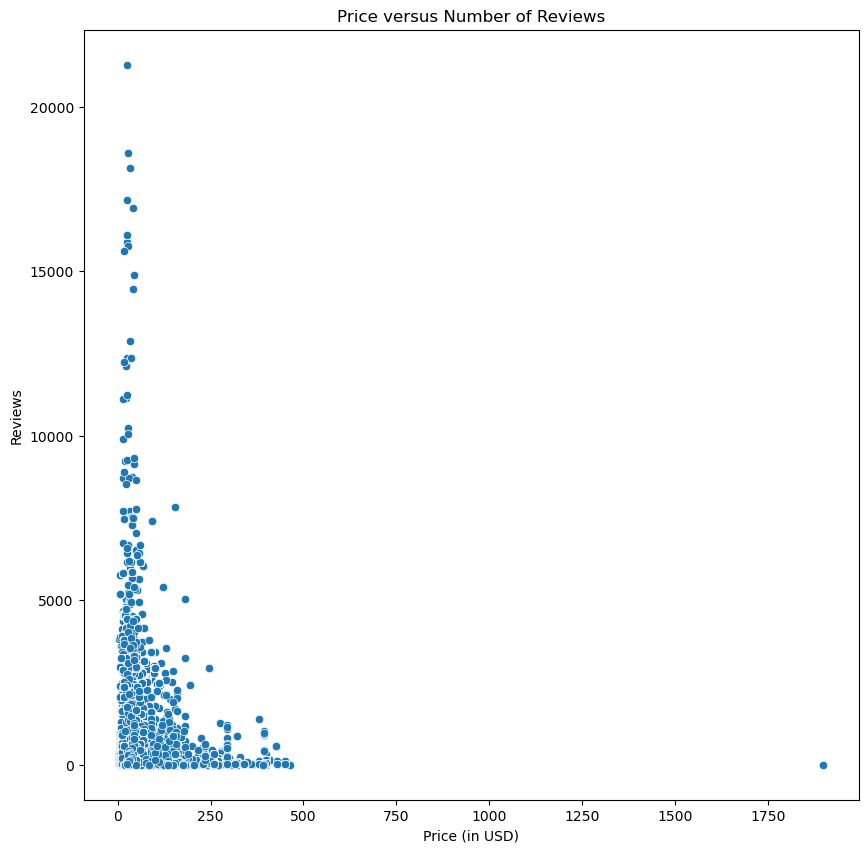

In [29]:
filtered_product_data3 = merged_data.dropna(subset=['price_usd_x', 'reviews'])

# scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(x='price_usd_x', y='reviews',  data=filtered_product_data3)
plt.title('Price versus Number of Reviews')
plt.xlabel('Price (in USD)')
plt.ylabel('Reviews')
plt.show()

### Distribution of users with different physical characteristics

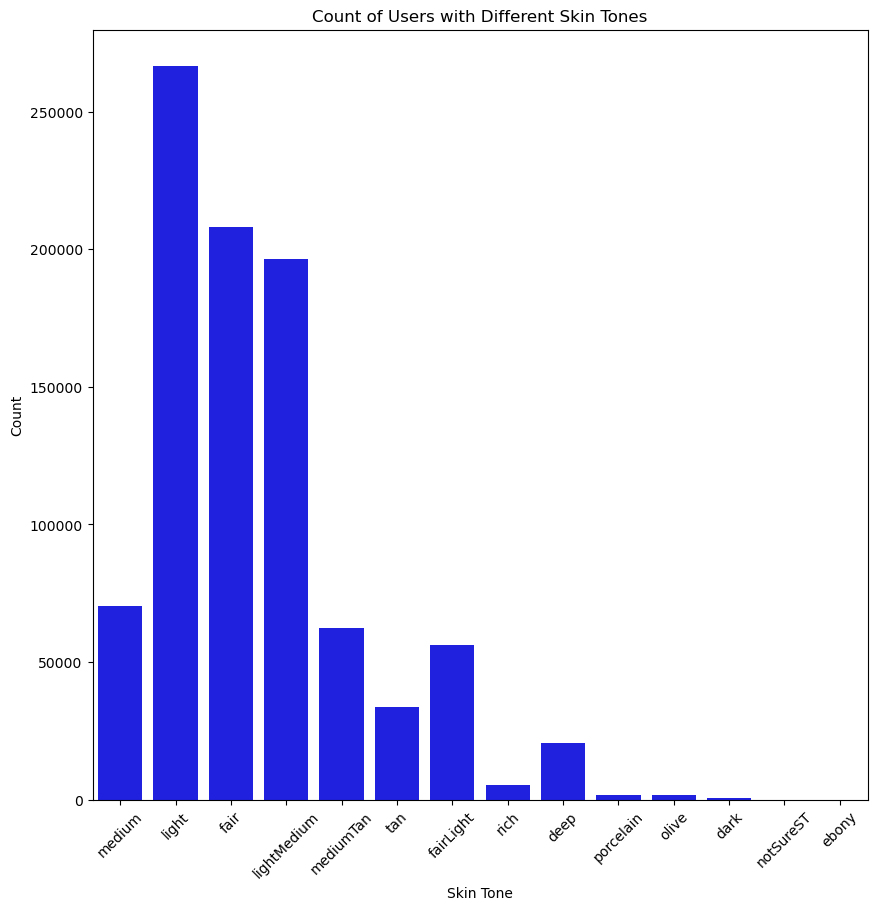

In [30]:
# skin tone
plt.figure(figsize=(10,10))
sns.countplot(data=merged_data, x='skin_tone', color='blue')
plt.title('Count of Users with Different Skin Tones')
plt.xlabel('Skin Tone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

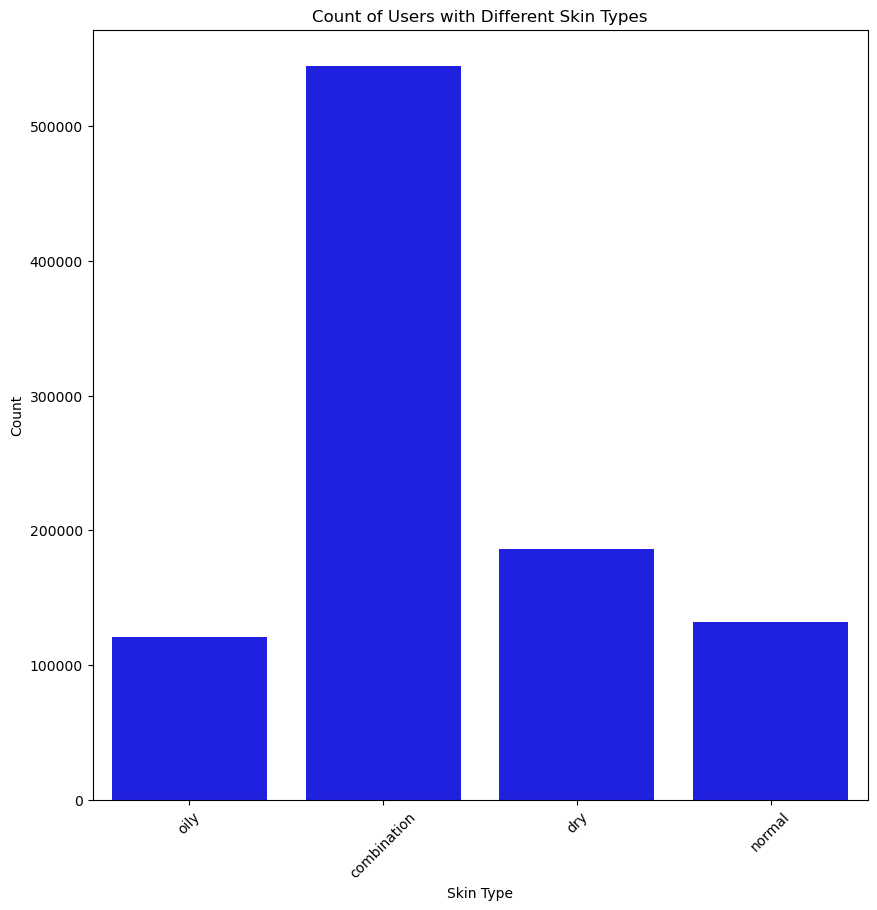

In [31]:
# skin type
plt.figure(figsize=(10,10))
sns.countplot(data=merged_data, x='skin_type', color='blue')
plt.title('Count of Users with Different Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
# spelling of grey should be uniform across records
merged_data['eye_color'] = merged_data['eye_color'].replace('gray', 'grey')

# bringing it all to lowercase
merged_data['eye_color'] = merged_data['eye_color'].replace('Grey', 'grey')

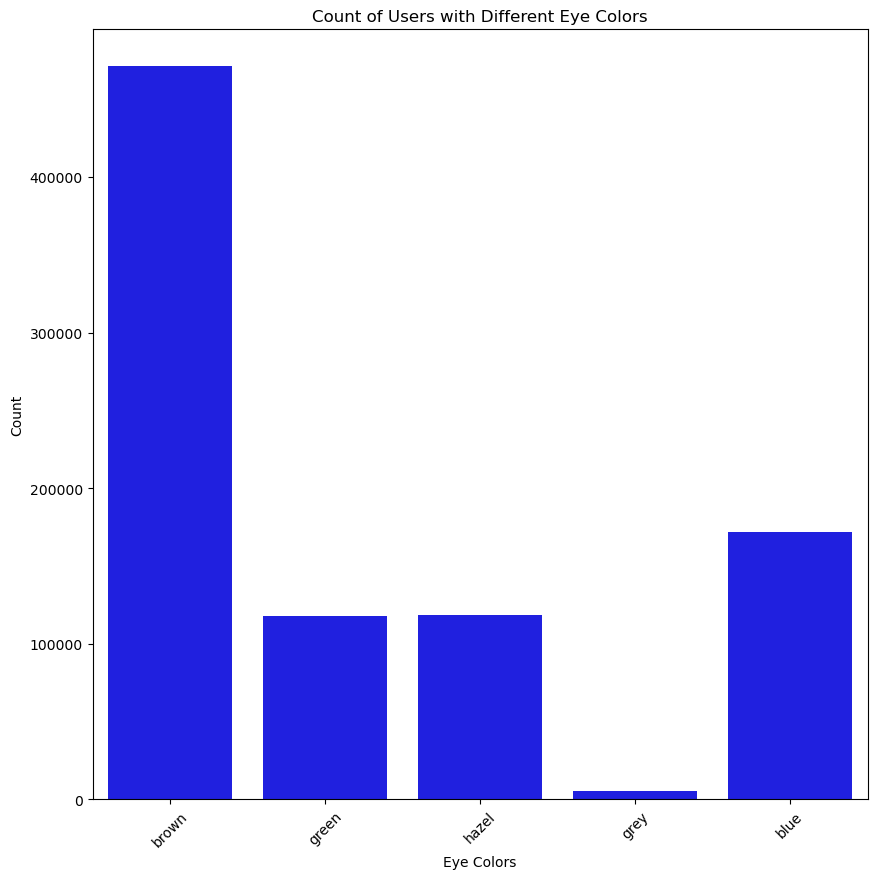

In [33]:
# eye color
plt.figure(figsize=(10,10))
sns.countplot(data=merged_data, x='eye_color', color='blue')
plt.title('Count of Users with Different Eye Colors')
plt.xlabel('Eye Colors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

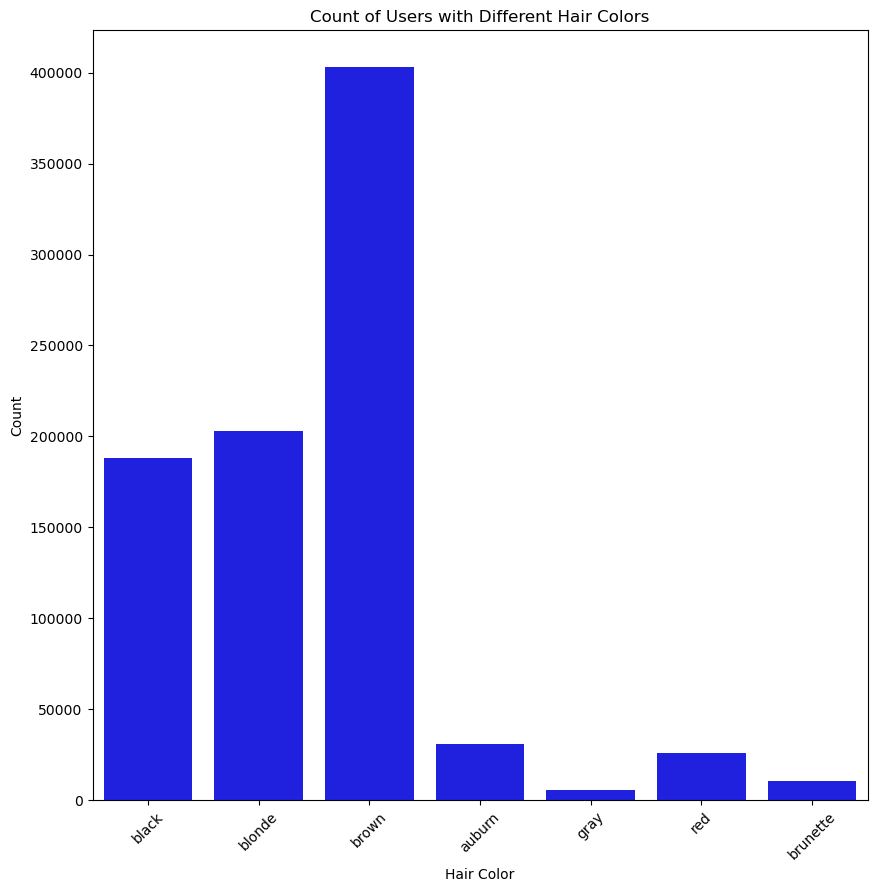

In [34]:
# hair color
plt.figure(figsize=(10,10))
sns.countplot(data=merged_data, x='hair_color', color='blue')
plt.title('Count of Users with Different Hair Colors')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Data Preprocessing

<div class="alert alert-block alert-info"> Now that we have finished exploring the dataset and gathered insights, we can proceed with data preprocessing. This step is to get the dataset ready for modeling. Here, we will drop necessary columns, rename columns, handling missing values, and do data type conversions. </div>

In [35]:
# drop unnecessary columns - repeated columns during merge and irrelevant columns
columns_to_drop = [
    'product_name_y', 'brand_name_y', 'price_usd_y', 'rating_x', 'variation_desc',
    'Unnamed: 0', 'limited_edition', 'online_only', 'sephora_exclusive', 
    'out_of_stock'
]
merged_data.drop(columns=columns_to_drop, inplace=True)

# rename columns - remove suffixes
merged_data.rename(columns={
    'product_name_x': 'product_name',
    'brand_name_x': 'brand_name',
    'price_usd_x': 'price_usd'
}, inplace=True)

# fill missing values in categorical columns with 'Not Specified'
categorical_cols = ['hair_color', 'skin_type', 'skin_tone', 'eye_color', 'brand_name', 'ingredients']
merged_data[categorical_cols] = merged_data[categorical_cols].fillna('Not Specified')

# convert 'is_recommended' to numeric (it was float)
#merged_data['is_recommended'] = pd.to_numeric(merged_data['is_recommended'], errors='coerce')
#merged_data['is_recommended'] = merged_data['is_recommended'].fillna(0).astype(int)

In [36]:
# look at the final dataset
merged_data.head()

,product_id,product_name,brand_id,brand_name,loves_count,reviews,size,variation_type,variation_value,ingredients,...,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,brand_plus_product
0,P473671,Fragrance Discovery Set,6342,19-69,6320,11.0,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",...,NaN,NaN,NaN,NaN,NaN,Not Specified,Not Specified,Not Specified,Not Specified,19-69 - Fragrance Discovery Set
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,NaN,NaN,NaN,NaN,NaN,Not Specified,Not Specified,Not Specified,Not Specified,19-69 - La Habana Eau de Parfum
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,NaN,NaN,NaN,NaN,NaN,Not Specified,Not Specified,Not Specified,Not Specified,19-69 - Rainbow Bar Eau de Parfum
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,NaN,NaN,NaN,NaN,NaN,Not Specified,Not Specified,Not Specified,Not Specified,19-69 - Kasbah Eau de Parfum
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",...,NaN,NaN,NaN,NaN,NaN,Not Specified,Not Specified,Not Specified,Not Specified,19-69 - Purple Haze Eau de Parfum


In [37]:
# percent missing in each column after data preprocessing
percent_missing = merged_data.isnull().sum() * 100 / len(merged_data)
print(percent_missing)

product_id                   0.000000
product_name                 0.000000
brand_id                     0.000000
brand_name                   0.000000
loves_count                  0.000000
reviews                      0.025260
size                         4.058047
variation_type               4.775777
variation_value              5.873769
ingredients                  0.000000
price_usd                    0.000000
value_price_usd             97.166064
sale_price_usd              99.093366
new                          0.000000
highlights                  10.515522
primary_category             0.000000
secondary_category           0.000727
tertiary_category           14.710228
child_count                  0.000000
child_max_price             58.588311
child_min_price             58.588311
author_id                    0.558173
rating_y                     0.558173
is_recommended              15.822122
helpfulness                 51.586292
total_feedback_count         0.558173
total_neg_fe

# Modeling

<div class="alert alert-block alert-info"> This step is building our model which takes user input and gives us beauty product recommendations. </div>

In [38]:
# Define a function for user inputs. The tertiary category is optional.
def get_user_preferences(product_info):
    user_preferences = {}
    
    # Print available primary categories
    unique_categories = product_info['primary_category'].dropna().str.lower().unique().tolist()
    print(f"Available primary categories: {', '.join(unique_categories).title()}")

    # Ask the user to select a preferred primary category
    primary_category_input = input("Enter your preferred primary category: ").strip().lower()
    if primary_category_input not in unique_categories:
        print("Invalid category. Please enter a valid category.")
        return None
    user_preferences['primary_category'] = primary_category_input

    # Ask if the user wants to specify a specific product type within the chosen category
    specific_type = input("Are you looking for a specific type of product (e.g., Lipstick, Mascara) within this category? (yes/no): ").strip().lower()
    
    if specific_type == 'yes':
        # Display available types within the selected category
        available_types = product_info[product_info['primary_category'].str.lower() == primary_category_input]['tertiary_category'].dropna().unique().tolist()
        print(f"Available product types in {primary_category_input}: {', '.join(available_types)}")
        
        # Get the specific type from the user
        specific_type_input = input("Enter the specific product type (or leave blank to skip): ").strip().title()
        if specific_type_input in available_types:
            user_preferences['tertiary_category'] = specific_type_input
        else:
            print("Invalid product type or not specified. Skipping this filter.")
            user_preferences['tertiary_category'] = None
    else:
        user_preferences['tertiary_category'] = None

    # Get the brand name, price range, and minimum rating
    user_preferences['brand_name'] = input("Enter preferred brand (or leave blank for no preference): ").strip().lower()
    try:
        user_preferences['min_price'] = float(input("Enter minimum price in USD: ").strip())
        user_preferences['max_price'] = float(input("Enter maximum price in USD: ").strip())
    except ValueError:
        print("Invalid price input, using default range 0 to 100.")
        user_preferences['min_price'] = 0
        user_preferences['max_price'] = 100

    # Get the minimum rating (optional)
    try:
        user_preferences['min_rating'] = float(input("Enter minimum rating (e.g., 4 for products rated above 4, or leave blank for no filter): ").strip())
    except ValueError:
        user_preferences['min_rating'] = 0  # No rating filter if left blank
    
    # Ask the user for their preference for ingredients (optional)
    ingredients_input = input("Enter preferred ingredients, separated by commas (or leave blank for no preference): ").strip().lower()
    user_preferences['ingredients'] = [ingredient.strip() for ingredient in ingredients_input.split(',')] if ingredients_input else []
    
    # Ask the user if they want to specify product highlights (optional)
    highlights_input = input("Enter any specific highlights (e.g., vegan, matte finish), separated by commas (or leave blank for no preference): ").strip().lower()
    user_preferences['highlights'] = [highlight.strip() for highlight in highlights_input.split(',')] if highlights_input else []

    # Ask the user to enter their physical characteristics, only if the primary category is not fragrance. 
    if primary_category_input != 'fragrance':
        user_preferences['skin_tone'] = input("Enter your skin tone (e.g., fair, medium, dark): ").strip().lower()
        user_preferences['eye_color'] = input("Enter your eye color (e.g., brown, blue, green): ").strip().lower()
        user_preferences['skin_type'] = input("Enter your skin type (e.g., oily, dry, combination): ").strip().lower()
        user_preferences['hair_color'] = input("Enter your hair color (e.g., black, brown, blonde): ").strip().lower()
    
    print("User preferences successfully gathered:", user_preferences)
    return user_preferences

# This function helps define user preferences
user_preferences = get_user_preferences(product_info)
if user_preferences is None:
    print("Exiting due to invalid category.")
    exit()

# Function for relaxed filtering
def apply_filter_with_fallback(data, column, preference):
    if column in data.columns and preference:
        filtered = data[data[column].str.lower() == preference]
        if filtered.empty:
            print(f"No matches for {column} = {preference}. Skipping this filter.")
            return data  # Return unfiltered data to retain options
        else:
            print(f"After {column} filter:", len(filtered), "products match")
            return filtered
    return data

# Filter and Recommend Products with optional tertiary category filtering and fallback suggestion
def get_recommendations(user_preferences, product_info, fallback=False):
    filtered_data = product_info.copy()

    # Apply primary and tertiary category filters
    filtered_data = filtered_data[filtered_data['primary_category'].str.lower() == user_preferences['primary_category']]
    if user_preferences['tertiary_category']:
        filtered_data = filtered_data[filtered_data['tertiary_category'] == user_preferences['tertiary_category']]
        print(f"After tertiary category filter: {len(filtered_data)} products match")

    # Apply other filters
    if not fallback:
        filtered_data = apply_filter_with_fallback(filtered_data, 'skin_tone', user_preferences.get('skin_tone'))
        filtered_data = apply_filter_with_fallback(filtered_data, 'eye_color', user_preferences.get('eye_color'))
        filtered_data = apply_filter_with_fallback(filtered_data, 'skin_type', user_preferences.get('skin_type'))
        filtered_data = apply_filter_with_fallback(filtered_data, 'hair_color', user_preferences.get('hair_color'))
    else:
        print("Applying relaxed filters for broader results.")

    filtered_data = filtered_data[
        (filtered_data['price_usd'] >= user_preferences['min_price']) &
        (filtered_data['price_usd'] <= user_preferences['max_price']) &
        (filtered_data['rating'] >= user_preferences['min_rating'])
    ]

    if not fallback and user_preferences['ingredients']:
        ingredient_filter = filtered_data['ingredients'].str.lower().apply(
            lambda x: any(ingredient in x for ingredient in user_preferences['ingredients']) if isinstance(x, str) else False
        )
        filtered_data = filtered_data[ingredient_filter]
        print("After ingredients filter:", len(filtered_data))

    if 'highlights' in filtered_data.columns and user_preferences['highlights']:
        filtered_data['highlights'] = filtered_data['highlights'].fillna('')
        highlights_filter = filtered_data['highlights'].str.lower().apply(
            lambda x: all(highlight in x for highlight in user_preferences['highlights']) if isinstance(x, str) else False
        )
        filtered_data = filtered_data[highlights_filter]
        print("After highlights filter:", len(filtered_data))

    return filtered_data

# Function to display recommendations in batches and ask for more
def display_recommendations_in_batches(recommended_products, batch_size=5):
    offset = 0  # Starting point for recommendations
    total_recommendations = len(recommended_products)
    
    while offset < total_recommendations:
        # Get the current batch
        batch_recommendations = recommended_products.iloc[offset:offset + batch_size]
        if batch_recommendations.empty:
            print("No more recommendations available.")
            break
        
        # Display the current batch
        print(f"\nShowing recommendations {offset + 1} to {offset + len(batch_recommendations)} of {total_recommendations}:")
        for idx, row in batch_recommendations.iterrows():
            print(f"\nProduct Name: {row['product_name']}")
            print(f"Brand Name: {row['brand_name']}")
            print(f"Price: ${row['price_usd']}")
            print(f"Rating: {row.get('rating', 'N/A')}")
            print(f"Highlights: {row['highlights']}")
        
        # Ask the user if they want more recommendations
        offset += batch_size  # Update offset for the next batch
        if offset < total_recommendations:
            show_more = input("Would you like to see more recommendations? (yes/no): ").strip().lower()
            if show_more != 'yes':
                print("Ending recommendations.")
                break
        else:
            print("No more recommendations available.")

# Try to get recommendations with all filters
recommended_products = get_recommendations(user_preferences, product_info)

# If no products found, use fallback recommendations
if recommended_products.empty:
    print("No products found matching the specified filters. Suggesting close matches instead.")
    recommended_products = get_recommendations(user_preferences, product_info, fallback=True)

# Display recommendations in batches
display_recommendations_in_batches(recommended_products)

Available primary categories: Fragrance, Bath & Body, Mini Size, Hair, Makeup, Skincare, Tools & Brushes, Men, Gifts
Enter your preferred primary category: gifts
Are you looking for a specific type of product (e.g., Lipstick, Mascara) within this category? (yes/no): yes
Available product types in gifts: 
Enter the specific product type (or leave blank to skip): 
Invalid product type or not specified. Skipping this filter.
Enter preferred brand (or leave blank for no preference): 
Enter minimum price in USD: 2
Enter maximum price in USD: 2000
Enter minimum rating (e.g., 4 for products rated above 4, or leave blank for no filter): 1
Enter preferred ingredients, separated by commas (or leave blank for no preference): 
Enter any specific highlights (e.g., vegan, matte finish), separated by commas (or leave blank for no preference): 
Enter your skin tone (e.g., fair, medium, dark): fair
Enter your eye color (e.g., brown, blue, green): brown
Enter your skin type (e.g., oily, dry, combination

# Modeling Evaluation

<div class="alert alert-block alert-info"> Finally, we have to evaluate if the model we built is meeting our requirements. To do this, we use two metrics called coverage and diversity. Coverage is the percentage of products recommended by the model to the total available products. Diversity refers to how diverse the recommendations are i.e. the number of unique brands in the recommendations. </div>

In [39]:
# Define relevance based on a criterion
# Example: Label as relevant if the brand matches user preference, or apply your own criteria
# This step adds an 'is_relevant' column based on whether the product matches specific user preferences.
if user_preferences['brand_name']:
    recommended_products['is_relevant'] = recommended_products['brand_name'].apply(
        lambda x: 1 if x == user_preferences['brand_name'] else 0
    )
else:
    recommended_products['is_relevant'] = 1

# Display recommendations for user to see the results
batch_size = 5
batch_recommendations = recommended_products.head(batch_size)
if batch_recommendations.empty:
    print("No more recommendations available.")
else:
    print(f"\nTop Recommended Products in {user_preferences['primary_category'].capitalize()}:")
    for idx, row in batch_recommendations.iterrows():
        print(f"\nProduct Name: {row['product_name']}")
        print(f"Brand Name: {row['brand_name']}")
        print(f"Price: ${row['price_usd']}")
        print(f"Rating: {row.get('rating', 'N/A')}")
        print(f"Highlights: {row['highlights']}")

# Define the evaluation function
def evaluate_model(recommended_products, product_info):
    total_products = len(product_info)
    unique_recommendations = recommended_products['product_name'].nunique()
    
    # Coverage: Percentage of products recommended by the model compared to the total available products
    coverage = (unique_recommendations / total_products) * 100

    # Diversity: Percentage of unique brands in the recommendations
    diversity = (recommended_products['brand_name'].nunique() / len(recommended_products)) * 100

    # Print the evaluation Results
    print(f"\nEvaluation Metrics:")
    print(f"Coverage: {coverage:.2f}%")
    print(f"Diversity: {diversity:.2f}%")
    
# Call the evaluation function with recommended_products and product_info
evaluate_model(recommended_products, product_info)


Top Recommended Products in Gifts:

Product Name: Heart Gift Card
Brand Name: SEPHORA COLLECTION
Price: $50.0
Rating: 4.8571
Highlights: nan

Product Name: Lips Gift Card
Brand Name: SEPHORA COLLECTION
Price: $50.0
Rating: 5.0
Highlights: nan

Product Name: Gift Card
Brand Name: SEPHORA COLLECTION
Price: $50.0
Rating: 4.2791
Highlights: nan

Product Name: Happy Birthday Gift Card
Brand Name: SEPHORA COLLECTION
Price: $50.0
Rating: 4.1176
Highlights: nan

Evaluation Metrics:
Coverage: 0.05%
Diversity: 25.00%


# Conclusion

To conclude, this project provides a low-cost beauty product recommender system that uses user input to recommend products to the user. In future, the datasets can be updated with the client's data since new products are introduced often in this industry. User feedback can also be incorporated in the future to ensure that the model meets business needs. Also, this script can be used as reference material to develop an application to be implemented on in-store kiosks. 